In [3]:
import pandas as pd  #导入pandas包并重命名为pd
import torch  #导入torch包
train_d =  pd.read_csv("./train.csv")#导入数据集train.csv
test_d = pd.read_csv("./test.csv")#导入数据集test.csv

In [4]:
train_d

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
X_label = train_d.iloc[:, -1]  # 提取训练数据集的最后一列作为标签（通常为目标变量）
X_label

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [6]:
X_train = train_d.iloc[:, 1:-1]  # 提取训练数据集的所有特征列（去除第一列假设为，最后一列已单独作为标签）
X_test = test_d.iloc[:, 1:]  # 提取测试数据集的所有特征列（去除第一列）
print("train shape for X", X_train.shape)  # 打印训练特征数据的形状（行数x列数）
print("test shape for X", X_test.shape)  # 打印测试特征数据的形状
all_features = pd.concat([X_train, X_test])# 将训练和测试的特征数据合并为一个DataFrame，便于后续统一处理缺失值等
all_features

train shape for X (1460, 79)
test shape for X (1459, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [7]:
all_features.describe()  # 显示所有特征的统计摘要（如均值、标准差、最小值、最大值等）

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [8]:
all_features.info()  # 显示数据集的基本信息，包括每列的数据类型、非空值数量等

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

In [9]:
miss_value = pd.DataFrame(data=all_features.isna().sum().values, index=all_features.isna().sum().index, columns=["缺失值"])
# 创建一个新DataFrame记录各特征的缺失值数量
miss_value = miss_value[miss_value["缺失值"]>0]  # 筛选出有缺失值的列
miss_value = miss_value.sort_values("缺失值", ascending=False)  # 按缺失值数量降序排列
miss_value["缺失率"] = miss_value["缺失值"]/all_features.shape[0]  # 计算并添加缺失率
miss_value  # 显示缺失值统计信息

,缺失值,缺失率
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
MasVnrType,1766,0.605002
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageFinish,159,0.054471
GarageQual,159,0.054471
GarageCond,159,0.054471


In [12]:
all_features.drop(["PoolQC", "MiscFeature", "Alley"], axis=1, inplace=True)
all_features

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,MnPrv,700,7,2006,WD,Normal


In [14]:
all_features.fillna(0, inplace=True)
all_features

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,MnPrv,700,7,2006,WD,Normal


In [15]:
numerical_col = all_features.dtypes[all_features.dtypes!="object"].index
all_features[numerical_col] = all_features[numerical_col].apply(lambda x: (x-x.mean())/x.std())
all_features

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.067320,RL,0.216038,-0.217841,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,-0.359539,-0.103313,-0.285886,-0.063139,0,-0.089577,-1.551918,0.157619,WD,Normal
1,-0.873466,RL,0.664045,-0.072032,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,-0.359539,-0.103313,-0.285886,-0.063139,0,-0.089577,-0.446848,-0.602858,WD,Normal
2,0.067320,RL,0.305639,0.137173,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,-0.359539,-0.103313,-0.285886,-0.063139,0,-0.089577,1.026577,0.157619,WD,Normal
3,0.302516,RL,0.066702,-0.078371,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,3.874303,-0.103313,-0.285886,-0.063139,0,-0.089577,-1.551918,-1.363335,WD,Abnorml
4,0.067320,RL,0.783513,0.518814,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,-0.359539,-0.103313,-0.285886,-0.063139,0,-0.089577,2.131647,0.157619,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.419286,RM,-1.098115,-1.043758,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,-0.359539,-0.103313,-0.285886,-0.063139,0,-0.089577,-0.078492,-1.363335,WD,Normal
1455,2.419286,RM,-1.098115,-1.049083,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,-0.359539,-0.103313,-0.285886,-0.063139,0,-0.089577,-0.815205,-1.363335,WD,Abnorml
1456,-0.873466,RL,3.053414,1.246594,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,-0.359539,-0.103313,-0.285886,-0.063139,0,-0.089577,1.026577,-1.363335,WD,Abnorml
1457,0.655311,RL,0.126436,0.034599,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,-0.359539,-0.103313,-0.285886,-0.063139,MnPrv,1.144116,0.289865,-1.363335,WD,Normal


In [16]:
new_features = pd.get_dummies(all_features, dtype=int)
new_features

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.067320,0.216038,-0.217841,0.646073,-0.507197,1.046078,0.896679,0.528944,0.581046,-0.292975,...,0,0,0,1,0,0,0,0,1,0
1,-0.873466,0.664045,-0.072032,-0.063174,2.187904,0.154737,-0.395536,-0.566919,1.178053,-0.292975,...,0,0,0,1,0,0,0,0,1,0
2,0.067320,0.305639,0.137173,0.646073,-0.507197,0.980053,0.848819,0.338845,0.098173,-0.292975,...,0,0,0,1,0,0,0,0,1,0
3,0.302516,0.066702,-0.078371,0.646073,-0.507197,-1.859033,-0.682695,-0.566919,-0.494445,-0.292975,...,0,0,0,1,1,0,0,0,0,0
4,0.067320,0.783513,0.518814,1.355319,-0.507197,0.947040,0.753100,1.389978,0.469107,-0.292975,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.419286,-1.098115,-1.043758,-1.481667,1.289537,-0.043338,-0.682695,-0.566919,-0.968539,-0.292975,...,0,0,0,1,0,0,0,0,1,0
1455,2.419286,-1.098115,-1.049083,-1.481667,-0.507197,-0.043338,-0.682695,-0.566919,-0.415429,-0.292975,...,0,0,0,1,1,0,0,0,0,0
1456,-0.873466,3.053414,1.246594,-0.772420,1.289537,-0.373465,0.561660,-0.566919,1.717993,-0.292975,...,0,0,0,1,1,0,0,0,0,0
1457,0.655311,0.126436,0.034599,-0.772420,-0.507197,0.682939,0.370221,-0.566919,-0.228864,-0.292975,...,0,0,0,1,0,0,0,0,1,0


In [17]:
nn = X_train.shape[0]
new_train_X = torch.tensor(new_features[:nn].values,dtype=torch.float32)
new_test_X = torch.tensor(new_features[nn:].values,dtype=torch.float32)
train_labels = torch.tensor(X_label.values.reshape(-1, 1),dtype=torch.float32)

In [18]:
import torch.nn as nn
import matplotlib.pyplot as plt
input_size = new_train_X.shape[1]
output_size = 1
learning_rate = 0.001
num_epochs = 1000

In [19]:
model = nn.Linear(input_size, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [20]:
loss_d = []
for num in range(num_epochs):
    inputs = new_train_X
    targets = train_labels
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    #反向传播
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_d.append(loss.item())

    if (num+1)%5 == 0:
        print("Epoch %d/%d, Loss: %.4f"%(num+1, num_epochs, loss.item()))

Epoch 5/1000, Loss: 26942605312.0000
Epoch 10/1000, Loss: 17429563392.0000
Epoch 15/1000, Loss: 11727547392.0000
Epoch 20/1000, Loss: 8271705600.0000
Epoch 25/1000, Loss: 6145464832.0000
Epoch 30/1000, Loss: 4811083264.0000
Epoch 35/1000, Loss: 3952335104.0000
Epoch 40/1000, Loss: 3382628864.0000
Epoch 45/1000, Loss: 2991344128.0000
Epoch 50/1000, Loss: 2712450560.0000
Epoch 55/1000, Loss: 2506171648.0000
Epoch 60/1000, Loss: 2348238848.0000
Epoch 65/1000, Loss: 2223592192.0000
Epoch 70/1000, Loss: 2122688640.0000
Epoch 75/1000, Loss: 2039311872.0000
Epoch 80/1000, Loss: 1969289856.0000
Epoch 85/1000, Loss: 1909724928.0000
Epoch 90/1000, Loss: 1858534912.0000
Epoch 95/1000, Loss: 1814170752.0000
Epoch 100/1000, Loss: 1775445632.0000
Epoch 105/1000, Loss: 1741428352.0000
Epoch 110/1000, Loss: 1711370240.0000
Epoch 115/1000, Loss: 1684662528.0000
Epoch 120/1000, Loss: 1660802688.0000
Epoch 125/1000, Loss: 1639373312.0000
Epoch 130/1000, Loss: 1620022656.0000
Epoch 135/1000, Loss: 1602458

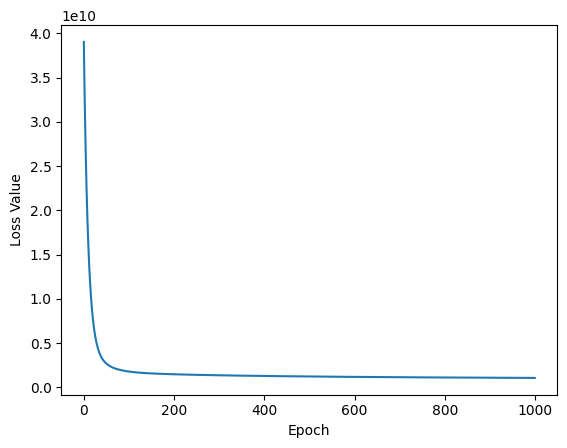

In [21]:
#画图
plt.plot(range(num_epochs), loss_d)
plt.xlabel("Epoch")
plt.ylabel("Loss Value")
plt.show()

In [22]:
#对测试集进行预测
model(new_test_X)

tensor([[108868.3906],
        [170638.0625],
        [187518.9844],
        ...,
        [193838.8281],
        [118492.4688],
        [241714.2656]], grad_fn=<AddmmBackward0>)

In [23]:
# 保存模型参数
torch.save(model.state_dict(), 'model.ckpt')